In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def plot_transfert_siege(df):
    transfert_true = df['transfertSiege'].value_counts(normalize=True)[1]
    transfert_false = df['transfertSiege'].value_counts(normalize=True)[0]
    labels = ['transfertSiege = TRUE', 'transfertSiege = FALSE']
    values = [transfert_true, transfert_false]
    plt.bar(labels, values)
    plt.title('Proportion d\'entreprises avec transfertSiege = TRUE ou FALSE')
    plt.ylabel('Proportion')
    plt.show()

In [3]:
def plot_siret_changes(df):
    df['dateLienSuccession'] = pd.to_datetime(df['dateLienSuccession'], errors='coerce')
    df['year'] = df['dateLienSuccession'].dt.year
    df_siret_changes = df.groupby('year').size().reset_index(name='siret_changes')
    fig, ax = plt.subplots()
    ax.bar(df_siret_changes['year'], df_siret_changes['siret_changes'])
    ax.set_xlabel('Année')
    ax.set_ylabel('Nombre de changements de SIRET')
    plt.show()

In [4]:
def plot_transfert_continuite(df):
    # Créer un tableau croisé des valeurs de transfertSiege et continuiteEconomique
    table = pd.crosstab(df['transfertSiege'], df['continuiteEconomique'])
    total = table.sum().sum()
    part_false_false = table.loc[False, False] / total
    part_false_true = table.loc[False, True] / total
    part_true_false = table.loc[True, False] / total
    part_true_true = table.loc[True, True] / total
    labels = ['Non transféré, pas de continuité', 'Non transféré, avec continuité', 'Transféré, pas de continuité', 'Transféré, avec continuité']
    sizes = [part_false_false, part_false_true, part_true_false, part_true_true]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    explode = (0, 0, 0.1, 0.1)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')
    plt.title("Répartition des entreprises selon transfertSiège et continuité économique")
    plt.show()

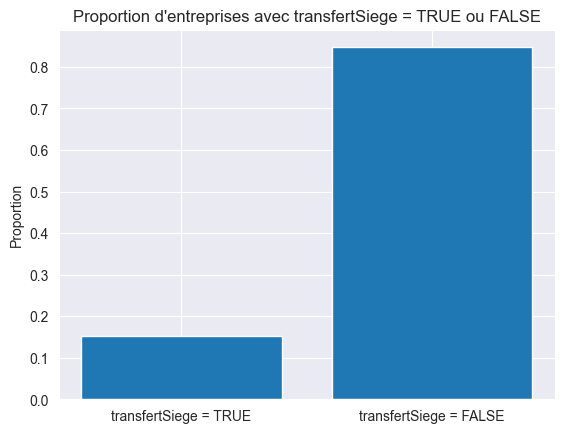

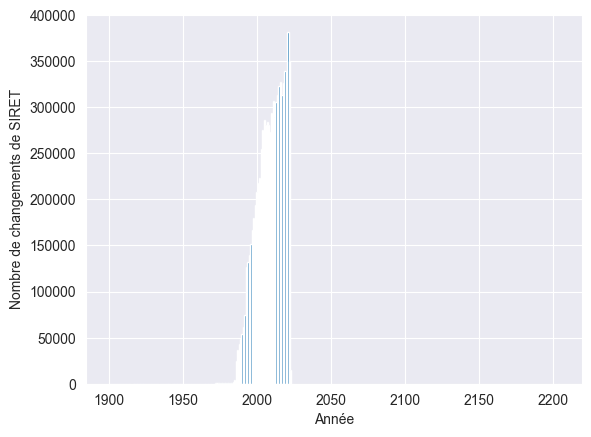

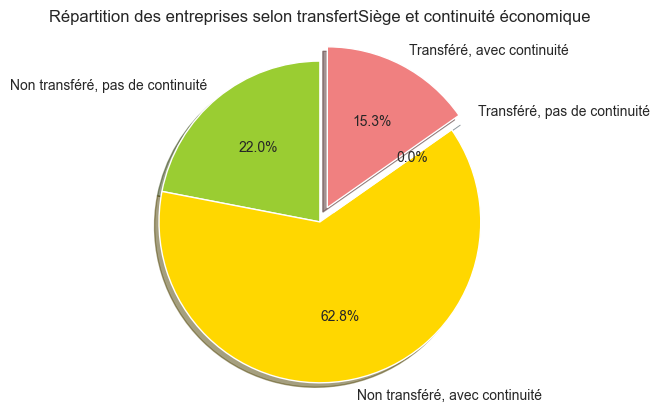

In [5]:
if __name__ == '__main__':

    df = pd.read_csv('H:\Documents\ING3\Etude de cas\StockEtablissementLiensSuccession_utf8\StockEtablissementLiensSuccession_utf8.csv')

    plot_transfert_siege(df)
    plot_siret_changes(df)
    plot_transfert_continuite(df)